In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


## Carga dos dados


In [2]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


## EDA

In [5]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

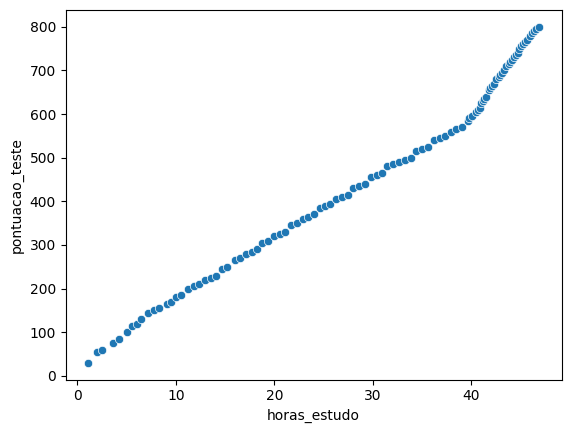

In [6]:
# PLot de dispersão, X: Horas de estudo, Y: Pontuaão do teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

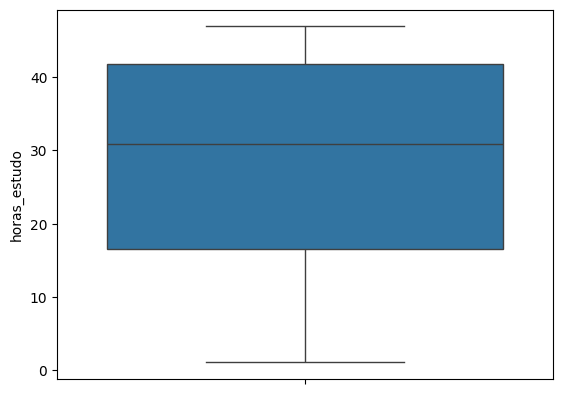

In [7]:
# Verificar se temos outrliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

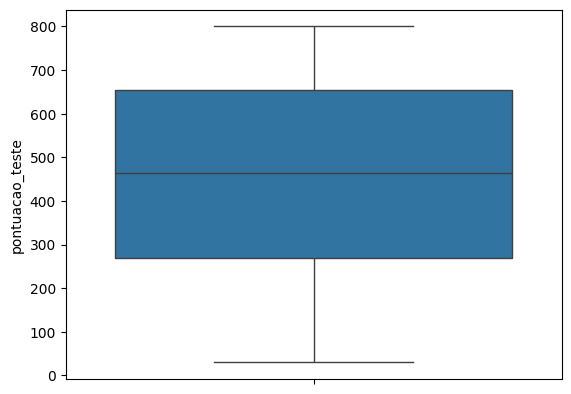

In [8]:
# Verificar se temos outrliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

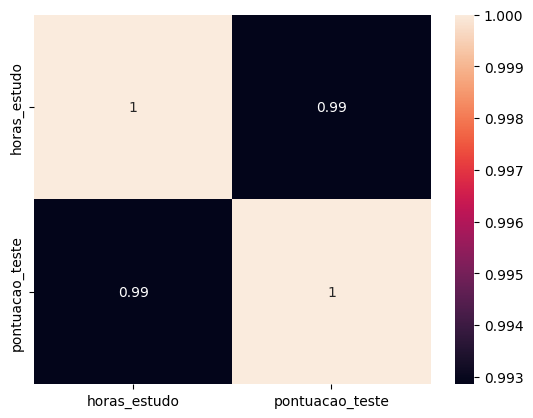

In [9]:
# Verificar correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot = True)

<Axes: >

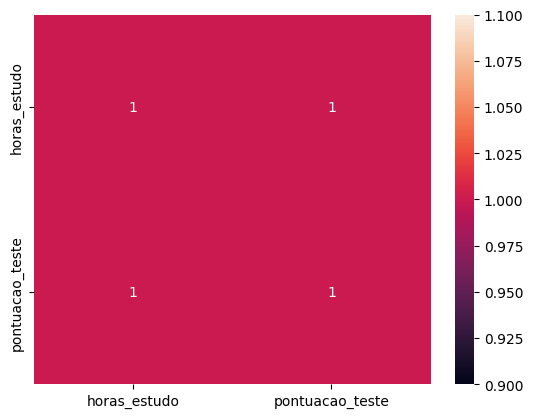

In [10]:
# Verificar correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot = True)

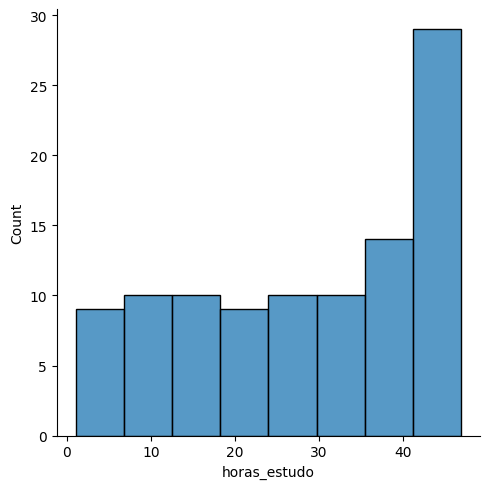

In [11]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

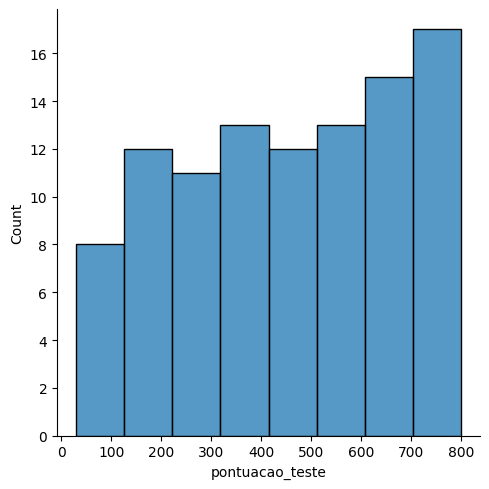

In [12]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar modelo

In [15]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
x = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

In [16]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [17]:
# Treinar o modelo
reg_model.fit(x_train, y_train)

LinearRegression()

In [23]:
# Imprimir a equação da reta
# y = a*x + b
print('A equação da reta é y = {:4f}*x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619*x + 8.476601


### Validar Modelo - Métricas

In [25]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(x_test)

In [31]:
# Calcular métrica R-squared ou Coeficiente de determinação
# R2 representa a proporção da variação na váriavel dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [27]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y_test - y_pred)
# É uma métrica fácil de interpretar 
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

np.float64(22.957470277134615)

In [28]:
# Calcular métrica MSE (Mean Squared Error)
# MSE Média (y_test - y_pred)²
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

np.float64(766.9972992416427)

In [32]:
# Calcular métrica SRMSE (Square Root Mean Squared Error)
# MSE Raíz (Média (y_test - y_pred)²)
# Não é uma métrica fácil de interpretar
# SRMSE é mais sensível a outliers e penaliza grandes erros
root_mean_squared_error(y_test, y_pred)

np.float64(27.69471608884342)

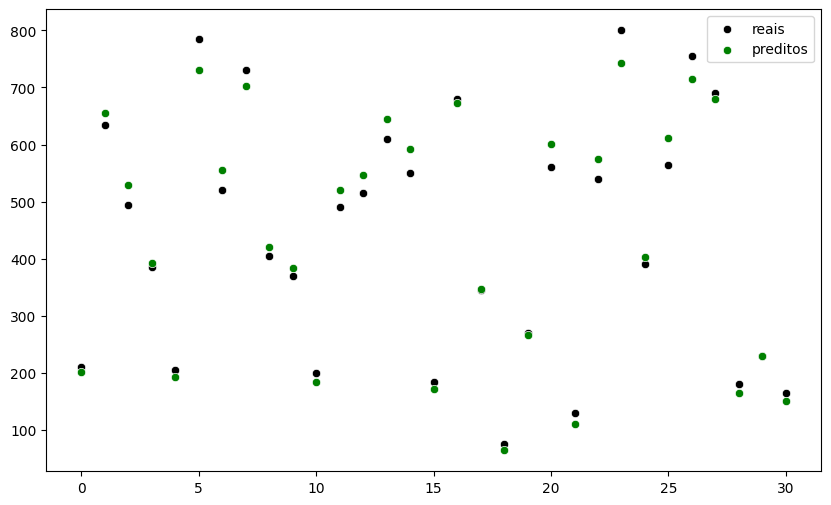

In [37]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='black', label='reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='green', label='preditos')
plt.legend()
plt.show()

### Análise de resíduos

In [38]:
# Calcular os resíduos
residuos = y_test - y_pred

In [39]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (x - media)/desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

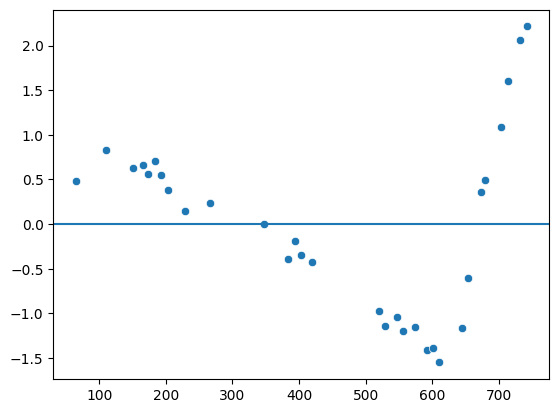

In [40]:
# Verificar linearidade do modelo:
# Se os residuos estiverem enre -2 e +2 (na escala padrão) - indica linearidade

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos Homocedasticidade, caso contrário, se tivermos alguma tendência ou padrão 
# (formam cone ou funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y = residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Resíduos na escala Padrão')

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

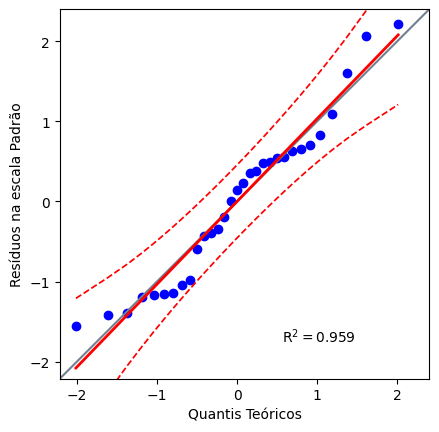

In [42]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quanttile) Plot que avalia se uma amosttra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala Padrão')

In [43]:
# Tese de normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1- Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-valor: 0.15663817850304967


In [44]:
# Tese de normalidade - Kolmogorov-SMirnov
# H0 - Segue distribuição normal
# H1- Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [47]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [48]:
# Quantas horas estudar para obter 600 pontos segundo o modelo?
# y = a*x + b
# y - b = a*x
# (y - b)/a = x
# x = (y - b) / a
(600 - reg_model.intercept_[0])/ reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois

In [51]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']